In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')



In [4]:
# Preview the data
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

**Step 2: Data Understanding**

In [5]:
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [6]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
print(customers.describe(include='all'))
print(products.describe(include='all'))
print(transactions.describe())


       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          N

**Step 3 : Data Cleaning**


In [8]:
customers.fillna('Unknown', inplace=True)  # Example for categorical missing values
transactions['TotalValue'].fillna(transactions['TotalValue'].mean(), inplace=True)  # Example for numeric


<ipython-input-8-92912360dbc8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions['TotalValue'].fillna(transactions['TotalValue'].mean(), inplace=True)  # Example for numeric


In [9]:
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())


0
0
0


**STEP 4: PERFORM EDA**

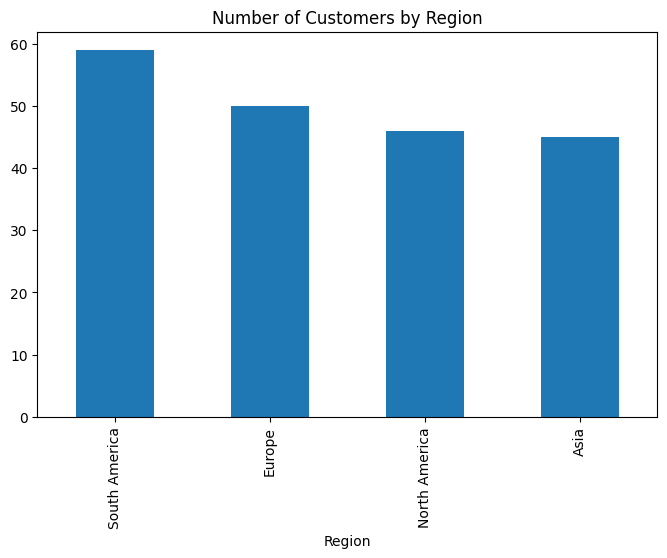

In [10]:
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Number of Customers by Region', figsize=(8, 5))
plt.show()


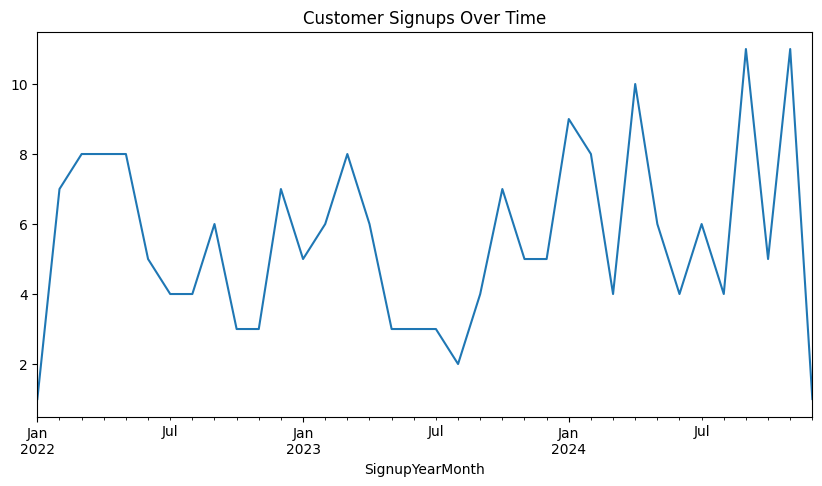

In [11]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers.groupby('SignupYearMonth').size()
signup_trends.plot(title='Customer Signups Over Time', figsize=(10, 5))
plt.show()


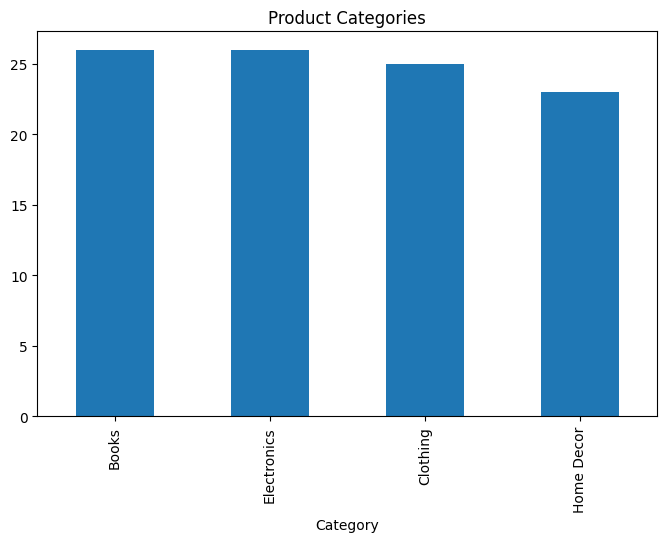

In [12]:
category_counts = products['Category'].value_counts()
category_counts.plot(kind='bar', title='Product Categories', figsize=(8, 5))
plt.show()


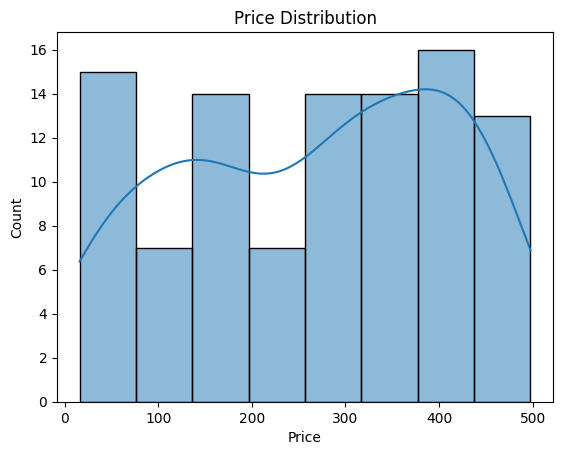

In [13]:
sns.histplot(products['Price'], kde=True)
plt.title('Price Distribution')
plt.show()


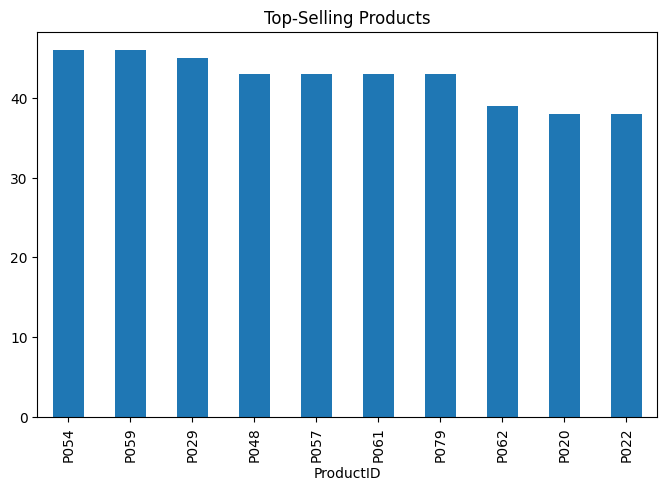

In [14]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10)
top_products.plot(kind='bar', title='Top-Selling Products', figsize=(8, 5))
plt.show()


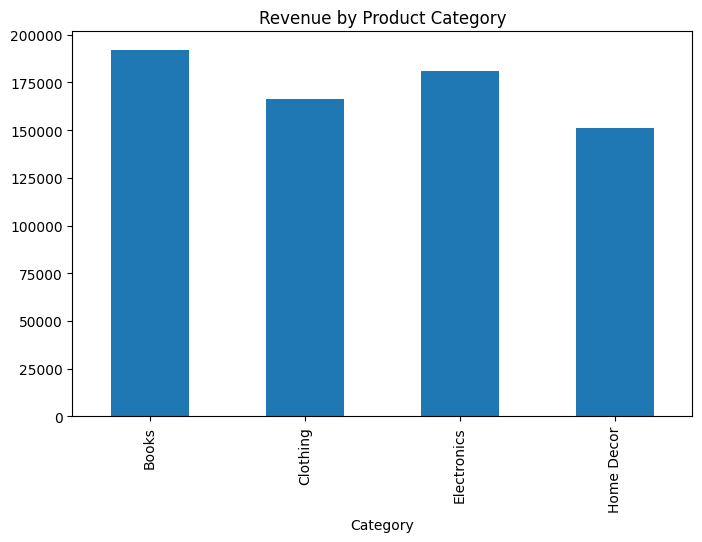

In [15]:
revenue_by_category = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum()
revenue_by_category.plot(kind='bar', title='Revenue by Product Category', figsize=(8, 5))
plt.show()


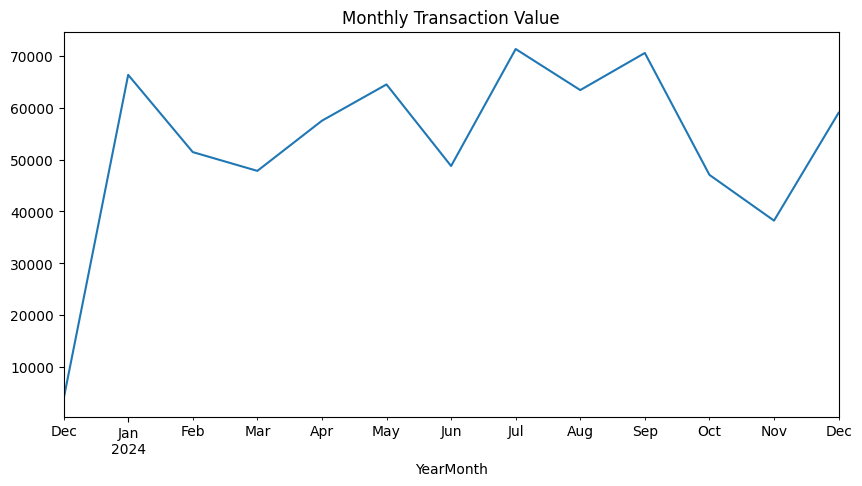

In [16]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()
monthly_sales.plot(title='Monthly Transaction Value', figsize=(10, 5))
plt.show()
